In [74]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/atm-data-m2/atm_data_m2.csv


In [75]:
data = pd.read_csv('../input/atm-data-m2/atm_data_m2.csv')
data.head()

,Unnamed: 0,atm_name,weekday,festival_religion,working_day,holiday_sequence,trans_date_set,trans_month,trans_year,prevweek_mean,total_amount_withdrawn
0,11,Mount Road ATM,MONDAY,NH,W,WWW,1,1,2011,648600.0,897100
1,16,Mount Road ATM,TUESDAY,NH,W,WWW,1,1,2011,648600.0,826000
2,21,Mount Road ATM,WEDNESDAY,NH,W,WWW,1,1,2011,648600.0,754400
3,26,Mount Road ATM,THURSDAY,NH,W,WWW,2,1,2011,648600.0,834200
4,31,Mount Road ATM,FRIDAY,NH,W,WWW,2,1,2011,648600.0,575300


In [76]:
data['atm_name'].value_counts()
# ATM_Name contains only Road ATM value so its kinda pointless and we'll drop it

Mount Road ATM    2244
Name: atm_name, dtype: int64

In [77]:
data.drop('atm_name', axis=1, inplace=True)

In [78]:
data['festival_religion'].value_counts()

NH    2079
H       70
N       39
M       36
C       20
Name: festival_religion, dtype: int64

In [79]:
data['working_day'].value_counts()
# W = Working Day
# H = Holiday

W    1281
H     963
Name: working_day, dtype: int64

In [80]:
data['festival_religion'].value_counts()
# The various religions are NH, H, N, M, C
# I'm assuming NH = Not Holiday

NH    2079
H       70
N       39
M       36
C       20
Name: festival_religion, dtype: int64

In [81]:
# Trying to figure out what do all these festival_religion terms mean
data[data['working_day'] == 'H']['festival_religion'].value_counts()

NH    800
H      68
N      39
M      36
C      20
Name: festival_religion, dtype: int64

In [82]:
data[data['working_day'] == 'W']['festival_religion'].value_counts()
# Working days generally have NH, so it could stand for No Holiday

NH    1279
H        2
Name: festival_religion, dtype: int64

In [83]:
data[(data['working_day'] == 'H') & (data['festival_religion'] == 'NH')]['weekday'].value_counts()
# Seems like NH stands for Normal Holiday

SUNDAY      491
SATURDAY    304
MONDAY        5
Name: weekday, dtype: int64

In [84]:
data[(data['working_day'] == 'H') & (data['festival_religion'] == 'C')]['weekday'].value_counts()
# Looks like C = Christianity

SUNDAY       7
TUESDAY      5
FRIDAY       5
THURSDAY     2
WEDNESDAY    1
Name: weekday, dtype: int64

In [85]:
data[data['festival_religion'] == 'M']['weekday'].value_counts()
# Guess M = Muslim

SUNDAY       14
MONDAY        7
TUESDAY       5
WEDNESDAY     3
SATURDAY      3
FRIDAY        2
THURSDAY      2
Name: weekday, dtype: int64

In [86]:
data[data['festival_religion'] == 'N']['weekday'].value_counts()
# The only assumption I can make right now is that N = Non-religious Holiday

TUESDAY      8
WEDNESDAY    8
THURSDAY     7
FRIDAY       5
SUNDAY       5
MONDAY       4
SATURDAY     2
Name: weekday, dtype: int64

In [87]:
data['holiday_sequence'].value_counts()

WWW    703
HHW    542
WHH    320
HWW    278
WWH    271
WHW     55
HHH     48
HWH     27
Name: holiday_sequence, dtype: int64

In [88]:
# Trying to figure out what does holiday_sequence mean
data[:15]
# Alright so from observing this, I can infer that for example, the holiday_sequence value "WHW" indicates that today is a Holiday (the middle H)
# yesterday was a Working Day (the first W) and tomorrow is also a Working Day (the last W)

,Unnamed: 0,weekday,festival_religion,working_day,holiday_sequence,trans_date_set,trans_month,trans_year,prevweek_mean,total_amount_withdrawn
0,11,MONDAY,NH,W,WWW,1,1,2011,648600.0,897100
1,16,TUESDAY,NH,W,WWW,1,1,2011,648600.0,826000
2,21,WEDNESDAY,NH,W,WWW,1,1,2011,648600.0,754400
3,26,THURSDAY,NH,W,WWW,2,1,2011,648600.0,834200
4,31,FRIDAY,NH,W,WWW,2,1,2011,648600.0,575300
5,36,SATURDAY,NH,H,WHH,2,1,2011,648600.0,792700
6,41,SUNDAY,NH,H,HHW,2,1,2011,648600.0,751800
7,46,MONDAY,NH,W,HWW,2,1,2011,775929.0,702200
8,51,TUESDAY,NH,W,WWW,3,1,2011,775929.0,506000
9,56,WEDNESDAY,NH,W,WWW,3,1,2011,775929.0,647600


In [89]:
# data['holiday_sequence'].unique()

In [90]:
amount_withdrawn_mean_list = []
sequence_list = data['holiday_sequence'].unique()

for sequence in sequence_list:
    amount_withdrawn_mean_list.append(np.mean(data[data['holiday_sequence'] == sequence]['total_amount_withdrawn'].sum()))

Text(0, 0.5, 'Mean Amount Withdrawn')

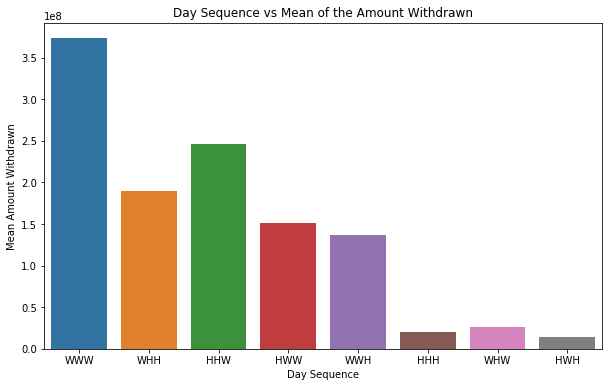

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# Plotting each of the sequences versus the mean of the amount withdrawn on the entirety of that particular sequence
plt.figure(figsize=(10,6))

sns.barplot(x=sequence_list, y=amount_withdrawn_mean_list)
plt.title('Day Sequence vs Mean of the Amount Withdrawn')
plt.xlabel('Day Sequence')
plt.ylabel('Mean Amount Withdrawn')

# Note that the mean amount withdrawm seems to be in correlation with the frequencies of each of these sequences, i.e., WWW occurs most often, 
# followed by HHW and WHH, and the largest mean amount withdrawals also happen in the same sequence

# Inference: It seems that largest withdrawals on average happen on days with sequence 'WWW' which could be any day from Tuesday to Thursday
# followed by 'HHW' which is most likely a Sunday and then 'WHH' which is most likely a Saturday

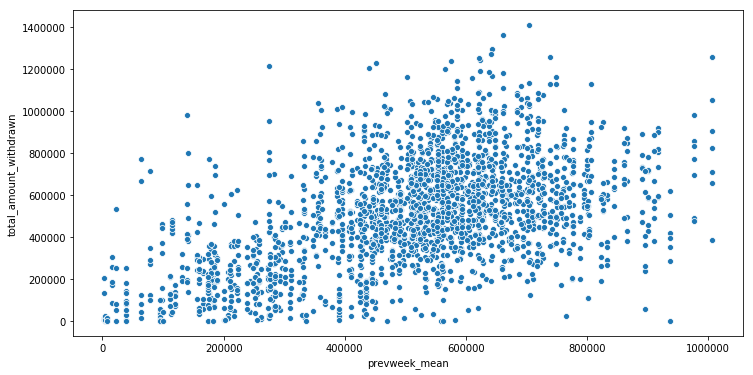

In [97]:
plt.figure(figsize=(12,6))
sns.scatterplot('prevweek_mean', 'total_amount_withdrawn', data=data)
# There is a bit of a positive correlation between the two attributes but still the affect of outliers is too much

In [99]:
data[['prevweek_mean', 'total_amount_withdrawn']].corr()
# So the actual correlation is 0.5024

,prevweek_mean,total_amount_withdrawn
prevweek_mean,1.000000,0.502479
total_amount_withdrawn,0.502479,1.000000


In [100]:
data.corr()
# So prevweek_mean has the biggest positive impact on the total amount withdrawn

,Unnamed: 0,trans_date_set,trans_month,trans_year,prevweek_mean,total_amount_withdrawn
Unnamed: 0,1.000000,0.021001,0.076284,0.988592,-0.398706,-0.299012
trans_date_set,0.021001,1.000000,-0.021240,0.012409,-0.139400,-0.273464
trans_month,0.076284,-0.021240,1.000000,-0.069692,0.058217,0.038138
trans_year,0.988592,0.012409,-0.069692,1.000000,-0.419636,-0.311817
prevweek_mean,-0.398706,-0.139400,0.058217,-0.419636,1.000000,0.502479
total_amount_withdrawn,-0.299012,-0.273464,0.038138,-0.311817,0.502479,1.000000
